<a href="https://colab.research.google.com/github/prasanthnaidu428/Acoustic-pest-detection-and-classification/blob/main/prasanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MFCC PEST DETECTION


In [ ]:
import os
import numpy as np
import librosa
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the folder in Google Drive
data_folder = '/content/drive/MyDrive/DLP_DATASET'  # Adjust path as necessary

# Define your labels here (in the correct order)
#labels_list = [label_to_index[file_name.split('_')[0]] for file_name in sorted(os.listdir(data_folder))]
labels_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
# Ensure that the length of labels_list matches the number of audio files
#assert len(labels_list) == 19, "Mismatch between labels and number of audio files"

# Function to convert an audio file to MFCC
def audio_to_mfcc(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc = cv2.resize(mfcc, (224, 224))  # Resize to match input shape for CNN
    return np.repeat(mfcc[..., np.newaxis], 3, axis=-1)  # Repeat across 3 channels (RGB)

# Load data and apply labels
def load_data(data_folder, labels_list):
    features = []
    labels = []
    audio_files = sorted(os.listdir(data_folder))  # Ensure files are sorted consistently

    for i, file_name in enumerate(audio_files):
        file_path = os.path.join(data_folder, file_name)

        try:
            mfcc = audio_to_mfcc(file_path)
            features.append(mfcc)
            labels.append(labels_list[i])
        except Exception as e:
            print(f"Error processing {file_name}: {e}")

    return np.array(features), np.array(labels)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
labels_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
features


array([[[[-3.71681549e+02, -3.71681549e+02, -3.71681549e+02],
         [-3.53766144e+02, -3.53766144e+02, -3.53766144e+02],
         [-3.51028381e+02, -3.51028381e+02, -3.51028381e+02],
         ...,
         [-3.05318970e+02, -3.05318970e+02, -3.05318970e+02],
         [-3.14891663e+02, -3.14891663e+02, -3.14891663e+02],
         [-3.14425751e+02, -3.14425751e+02, -3.14425751e+02]],

        [[-3.71681549e+02, -3.71681549e+02, -3.71681549e+02],
         [-3.53766144e+02, -3.53766144e+02, -3.53766144e+02],
         [-3.51028381e+02, -3.51028381e+02, -3.51028381e+02],
         ...,
         [-3.05318970e+02, -3.05318970e+02, -3.05318970e+02],
         [-3.14891663e+02, -3.14891663e+02, -3.14891663e+02],
         [-3.14425751e+02, -3.14425751e+02, -3.14425751e+02]],

        [[-3.71681549e+02, -3.71681549e+02, -3.71681549e+02],
         [-3.53766144e+02, -3.53766144e+02, -3.53766144e+02],
         [-3.51028381e+02, -3.51028381e+02, -3.51028381e+02],
         ...,
         [-3.05318970e+0

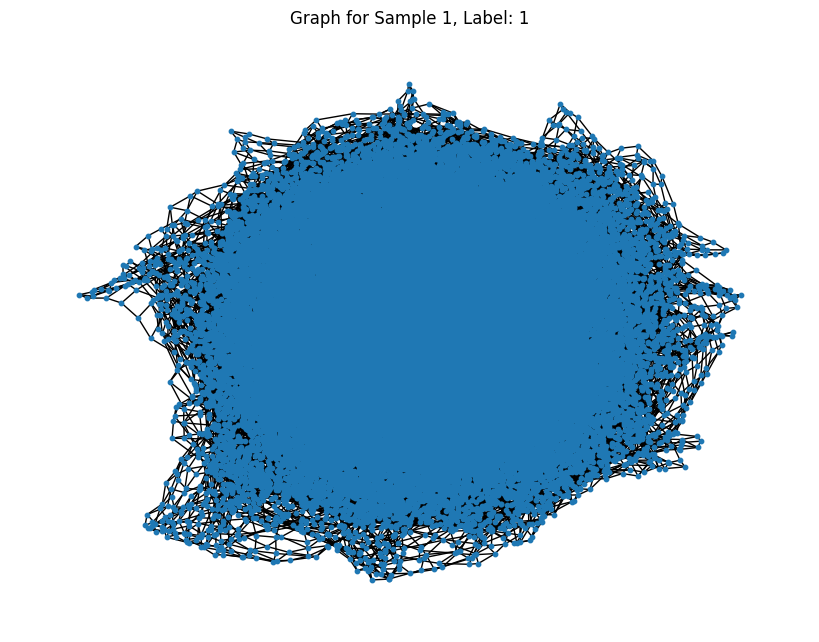

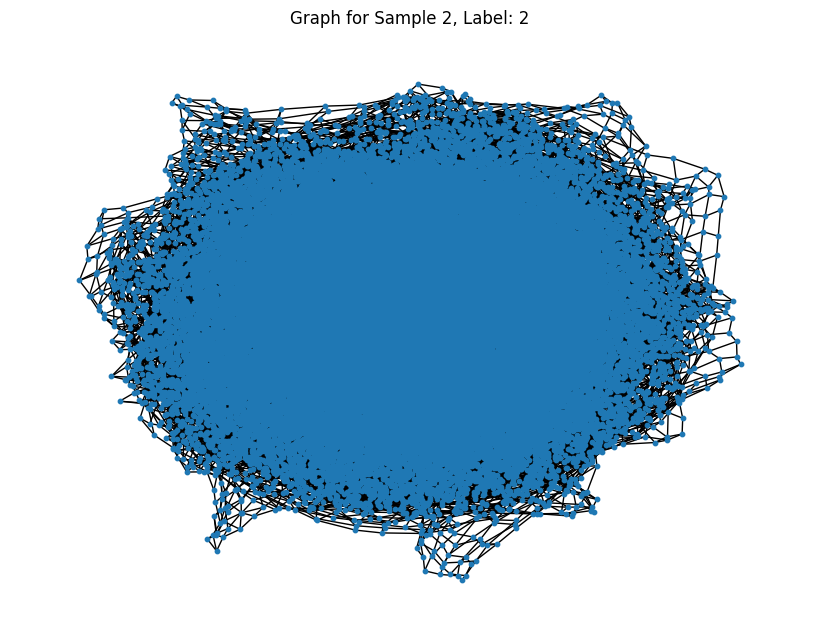

In [ ]:
# prompt: convert lthe above features and labels into graphs

import matplotlib.pyplot as plt
import networkx as nx

# Assuming 'features' and 'labels' are your data from the previous code
# features: numpy array of MFCCs (e.g., shape (num_samples, 224, 224, 3))
# labels: numpy array of labels (e.g., shape (num_samples,))

def create_graph_from_mfcc(mfcc, label):
  """Creates a graph representation from an MFCC."""
  graph = nx.Graph()
  # You can experiment with different ways to represent MFCCs as graphs
  # Here's a basic example using pixel connections as edges
  for i in range(mfcc.shape[0]):
    for j in range(mfcc.shape[1]):
      node_id = i * mfcc.shape[1] + j
      graph.add_node(node_id, mfcc_value=mfcc[i, j], label=label)
      # Connect to adjacent pixels
      if i > 0:
        graph.add_edge(node_id, (i - 1) * mfcc.shape[1] + j)
      if j > 0:
        graph.add_edge(node_id, i * mfcc.shape[1] + (j - 1))

  return graph


# Example: Create graphs for the first 5 samples
for i in range(min(5, len(features))):
  graph = create_graph_from_mfcc(features[i], labels[i])

  # Visualize the graph (optional)
  plt.figure(figsize=(8, 6))
  nx.draw(graph, with_labels=False, node_size=10)
  plt.title(f"Graph for Sample {i+1}, Label: {labels[i]}")
  plt.show()



In [ ]:
count = 0
for i in labels_list:
  count += 1
  print(i)
print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
19


In [ ]:
# Load data and apply labels
def load_data(data_folder, labels_list):
    features = []
    labels = []
    audio_files = sorted(os.listdir(data_folder))  # Ensure files are sorted consistently
     # Convert labels_list (dict_keys) to a list
    labels_list = list(labels_list)

    # Ensure labels_list has enough elements
    #assert len(labels_list) >= len(audio_files), "labels_list must have at least as many elements as audio files"
    num_files_to_process = min(len(labels_list), len(audio_files))
    audio_files = audio_files[:num_files_to_process]

    for i, file_name in enumerate(audio_files):
        file_path = os.path.join(data_folder, file_name)

        try:
            mfcc = audio_to_mfcc(file_path)
            features.append(mfcc)
            # Subtract 1 from the label to make it 0-indexed
            labels.append(labels_list[i] - 1)
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

    return np.array(features), np.array(labels)

X, y = load_data(data_folder, labels_list)
X = X / 255.0  # Normalize features

# Ensure y is not empty before proceeding
if len(y) > 0:
  y = to_categorical(y, num_classes=np.max(y) + 1)
else:
  print("Warning: y is empty. Check your labels and data.")
# Check the number of samples for each class
if y.ndim == 2:  # Ensure y is two-dimensional (i.e., one-hot encoded)
    from collections import Counter
    class_counts = Counter(np.argmax(y, axis=1))  # Get counts of each class

    # Identify classes with less than 2 samples
    small_classes = [cls for cls, count in class_counts.items() if count < 2]

    # If there are classes with less than 2 samples, handle them
    if small_classes:
        print("Classes with less than 2 samples:", small_classes)
        # Optionally, handle these classes by either removing or reassigning them as described
else:
    print("Error: y is not in the expected shape. Expected two dimensions (one-hot encoding).")
from collections import Counter
class_counts = Counter(np.argmax(y, axis=1))  # Get counts of each class

# Identify classes with less than 2 samples
small_classes = [cls for cls, count in class_counts.items() if count < 2]

# If there are classes with less than 2 samples, handle them:
if small_classes:
    # Option 1: Remove these samples (but you might lose important data)
    # mask = np.in1d(np.argmax(y, axis=1), small_classes, invert=True)
    # X = X[mask]
    # y = y[mask]
    print("Classes with less than 2 samples:", small_classes)
    # Option 2: Combine these classes with another class (e.g., an "other" class)
    # You'll need to adjust this based on your specific labels and logic
    for cls in small_classes:
        y = np.where(y[:, cls] == 1, 0, y)  # Set the one-hot encoding for the small class to 0
        y[:, -1] = np.where(np.sum(y, axis=1) == 0, 1, y[:, -1])  # Assign it to the last class (assuming it's your "other" class)

# Now you can use stratify safely (or split without it if you prefer)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(set(labels_list)), activation='softmax')  # Output layer size matches number of unique labels
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=8),
                    epochs=30,
                    validation_data=(X_test, y_test),
                    callbacks=[reduce_lr, early_stop])

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Predict on a sample to check the output
predictions = model.predict(X_test[:1])
print("Predicted classes:", np.argmax(predictions, axis=1))
print("True classes:", np.argmax(y_test[:1], axis=1))

<ipython-input-12-e63d498fa0b3>:27: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Classes with less than 2 samples: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Classes with less than 2 samples: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3972 - loss: 2.0239 - val_accuracy: 1.0000 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 1.0000 - loss: 9.8616e-04 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00 - learning_rate: 2.0000e-04
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 

In [ ]:


# Assuming you have a new audio file you want to predict on
new_audio_file = '/content/sitophilus oryzae adults in maize - Copy.wav'  # Replace with actual path

# Convert the new audio file to MFCC features
new_mfcc = audio_to_mfcc(new_audio_file)
new_mfcc = new_mfcc / 255.0  # Normalize

# Make the prediction
prediction = model.predict(np.expand_dims(new_mfcc, axis=0))

# Get the predicted class label
predicted_class = np.argmax(prediction)

# You might want to map the predicted class back to your original label names
# (if you have a mapping from numerical labels to actual insect names)
print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Class: 18


In [ ]:


# Predict on a small batch of test data
predictions = model.predict(X_test[:1])

# Get the predicted class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels
true_classes = np.argmax(y_test[:1], axis=1)

# Compare predicted and true labels
for i in range(len(predicted_classes)):
  if predicted_classes[i] == true_classes[i]:
    print(f"Prediction {i+1}: Predicted class {predicted_classes[i]} matches true class {true_classes[i]}")
  else:
    print(f"Prediction {i+1}: Predicted class {predicted_classes[i]} does not match true class {true_classes[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction 1: Predicted class 18 matches true class 18


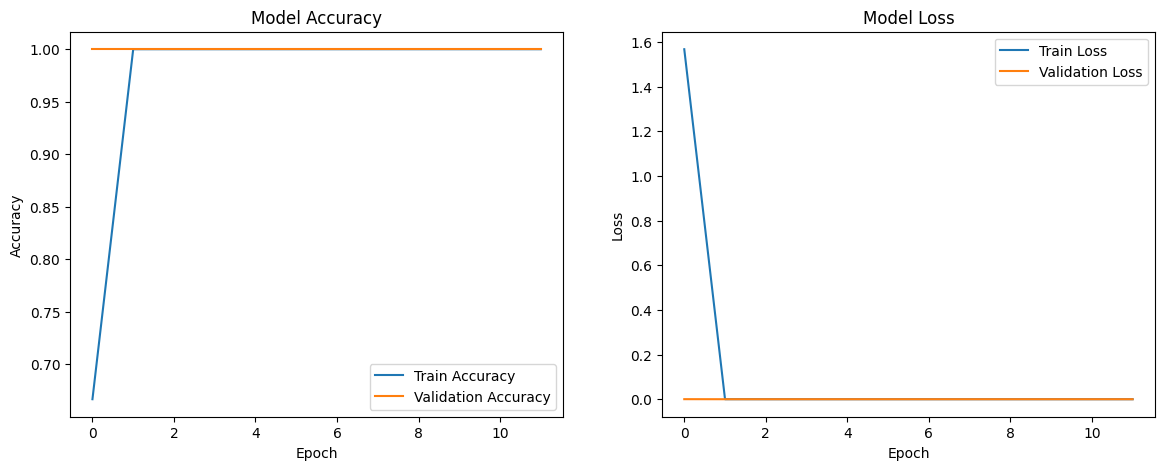

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

Try ramkumar
